Importowanie bibliotek

In [33]:
from itertools import chain
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

Importowanie zestawu danych

In [34]:
df = pd.read_csv('ToxinsbaseClass.csv')
df = df.iloc[:, 0:23]
test_size = 0.3
dftrain, dftest = train_test_split(df, test_size=test_size, random_state=0)

dftrain.head()

,Latitude,Longitude,MaximumDepth,SecchiDepth,Sampling Depth,T_Surf,T_Epi,Zeu / Zmix,BuoyFreq,TP,...,MC_dmRR,MC_RR,MC_dmLR,MC_LR,CYN,ATX,ToxinRichness,TDI,TTC,Toxicity
66,52.300028,4.840333,2.0,0.20,1.5,22.5,22.5,0.27,0.00,0.29,...,0.383,1.987,0.057,1.414,0.000,0.051,6,1.14,3.980,3
89,52.249056,16.751917,12.0,0.75,8.0,24.1,20.9,0.26,0.01,0.03,...,6.252,0.000,1.076,0.043,0.036,0.068,6,0.86,8.741,3
63,54.985667,25.216611,4.6,0.70,4.0,20.5,20.1,0.48,0.00,0.13,...,3.520,0.000,0.504,0.023,0.380,0.290,6,0.97,4.860,3
90,52.429867,16.658267,19.5,2.70,10.0,22.9,19.7,0.89,0.01,0.07,...,0.000,0.000,0.000,0.000,0.010,0.000,1,0.00,0.010,1
15,48.777950,16.742849,5.5,0.32,3.0,22.1,21.4,1.28,0.00,0.33,...,0.000,0.000,0.015,0.000,0.000,0.006,2,0.58,0.021,1


In [35]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 66 to 47
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         95 non-null     float64
 1   Longitude        95 non-null     float64
 2   MaximumDepth     95 non-null     float64
 3   SecchiDepth      95 non-null     float64
 4   Sampling Depth   95 non-null     float64
 5   T_Surf           95 non-null     float64
 6   T_Epi            95 non-null     float64
 7   Zeu / Zmix       95 non-null     float64
 8   BuoyFreq         95 non-null     float64
 9   TP               95 non-null     float64
 10  TN               95 non-null     float64
 11  Chlorophyl_a     95 non-null     float64
 12  MC_YR            95 non-null     float64
 13  MC_dmRR          95 non-null     float64
 14  MC_RR            95 non-null     float64
 15  MC_dmLR          95 non-null     float64
 16  MC_LR            95 non-null     float64
 17  CYN              95 no

Z analizy korealacji widzimy, że bardzo niewiele zmiennych przedstawia relacje ze sobą.

<Axes: >

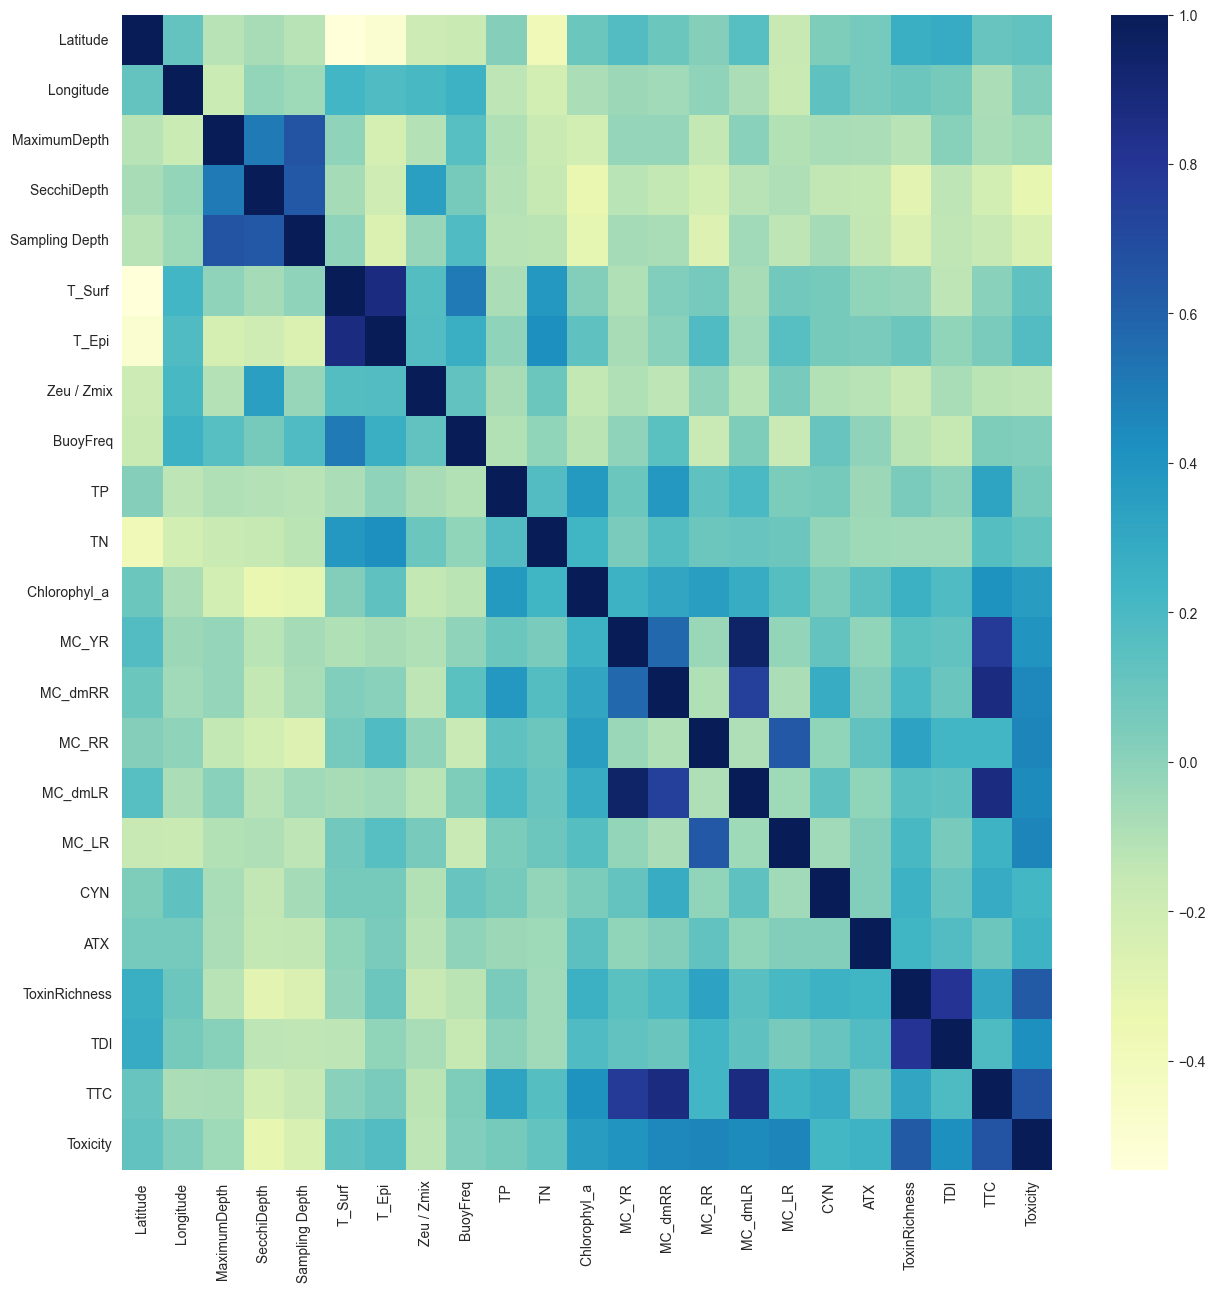

In [36]:
plt.figure(figsize=(15, 15))
sns.heatmap(dftrain.corr(), fmt='.2f', cmap='YlGnBu')

In [37]:
dftrain.describe()

,Latitude,Longitude,MaximumDepth,SecchiDepth,Sampling Depth,T_Surf,T_Epi,Zeu / Zmix,BuoyFreq,TP,...,MC_dmRR,MC_RR,MC_dmLR,MC_LR,CYN,ATX,ToxinRichness,TDI,TTC,Toxicity
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,51.638413,15.812886,15.604211,1.493263,6.156842,21.986316,20.649474,0.878632,0.005368,0.090737,...,0.555495,0.199032,0.196884,0.208653,0.046389,0.031284,4.042105,0.808211,1.438800,1.873684
std,5.815099,9.176256,19.105964,1.266053,4.542182,3.363243,3.359992,0.824875,0.005800,0.117964,...,1.643822,0.503148,0.591335,0.554815,0.217256,0.145409,1.649731,0.387144,2.804613,0.802153
min,36.755550,-8.589444,1.000000,0.200000,0.700000,9.000000,8.700000,0.130000,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,48.797450,11.655176,4.000000,0.625000,2.650000,19.850000,18.850000,0.370000,0.000000,0.030000,...,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000,3.000000,0.615000,0.031500,1.000000
50%,52.429867,16.796722,8.500000,1.050000,5.000000,21.700000,20.100000,0.560000,0.010000,0.060000,...,0.000000,0.000000,0.008000,0.023000,0.000000,0.000000,4.000000,0.940000,0.189000,2.000000
75%,55.235153,22.097308,20.250000,1.800000,8.750000,23.650000,22.250000,1.085000,0.010000,0.090000,...,0.087500,0.120000,0.053000,0.095000,0.004500,0.004000,5.000000,1.070000,1.196500,3.000000
max,62.239189,32.796111,143.000000,5.500000,26.000000,31.400000,31.200000,4.680000,0.030000,0.870000,...,9.077000,3.309000,3.166000,3.683000,2.007000,1.333000,7.000000,1.440000,13.449000,3.000000


In [38]:
dftrain.columns

Index(['Latitude ', 'Longitude ', 'MaximumDepth ', 'SecchiDepth ',
       'Sampling Depth ', 'T_Surf ', 'T_Epi ', 'Zeu / Zmix', 'BuoyFreq', 'TP ',
       'TN ', 'Chlorophyl_a ', 'MC_YR ', 'MC_dmRR ', 'MC_RR ', 'MC_dmLR ',
       'MC_LR ', 'CYN ', 'ATX ', 'ToxinRichness', 'TDI', 'TTC', 'Toxicity'],
      dtype='object')

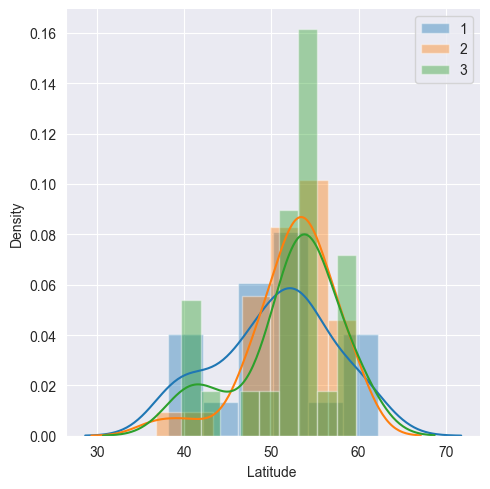

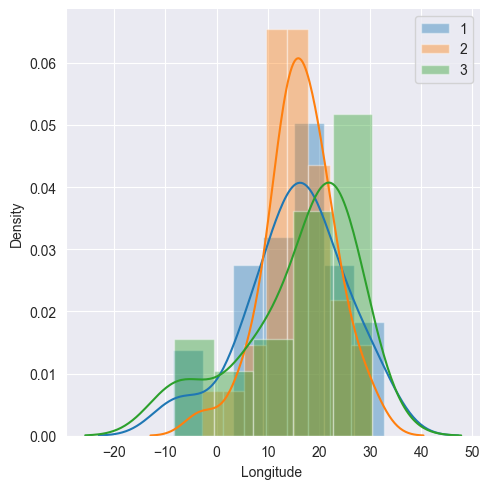

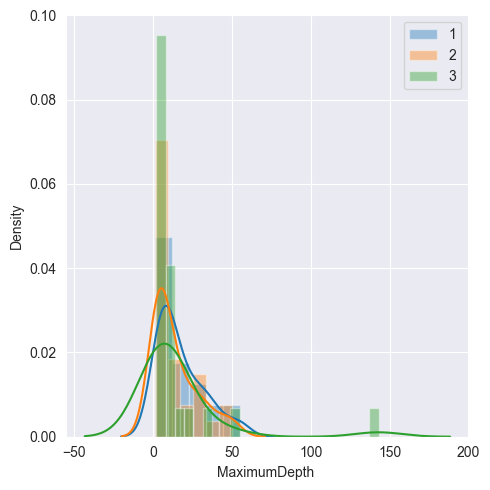

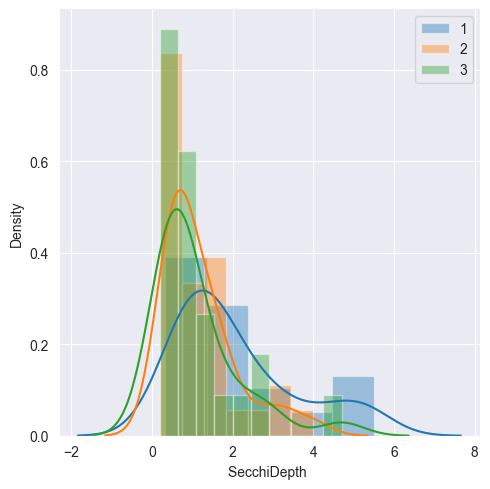

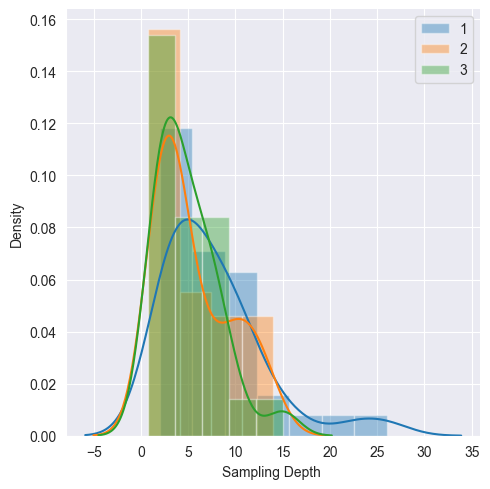

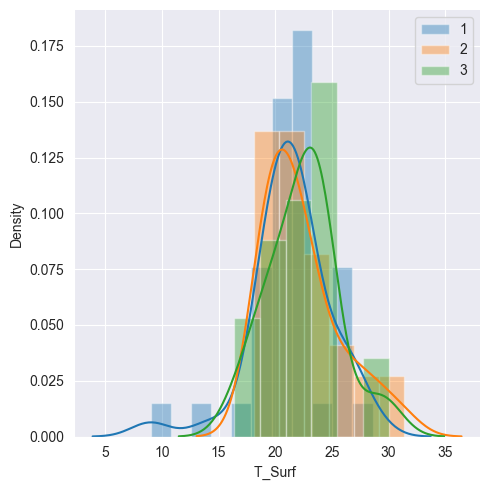

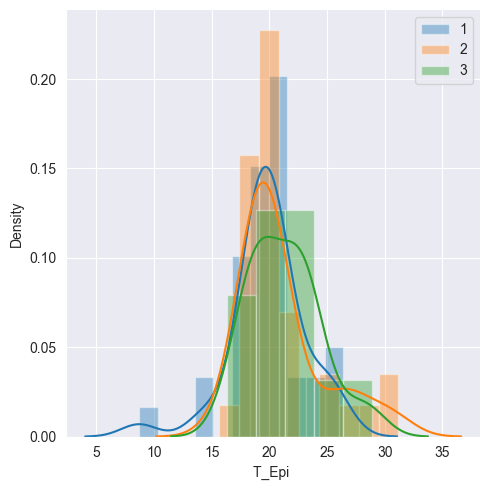

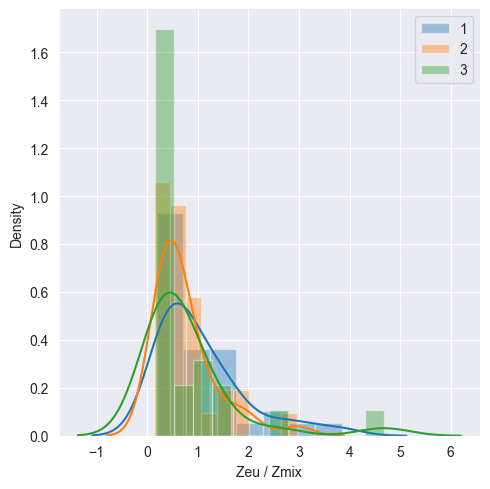

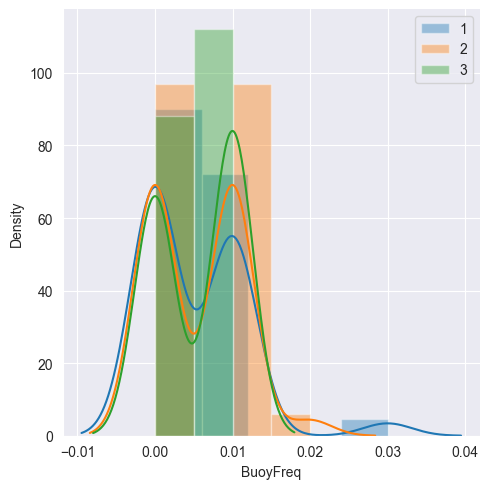

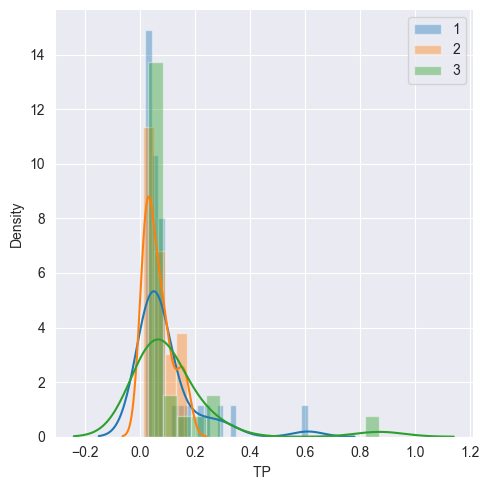

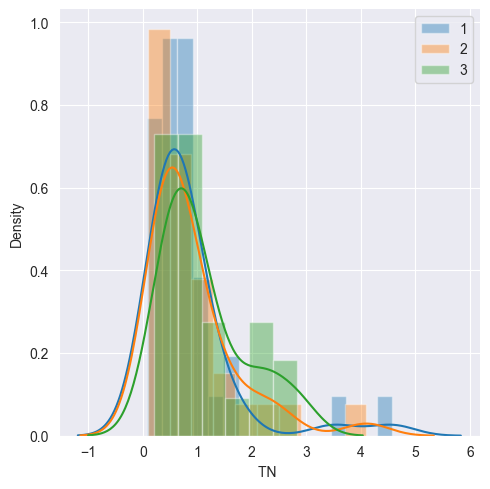

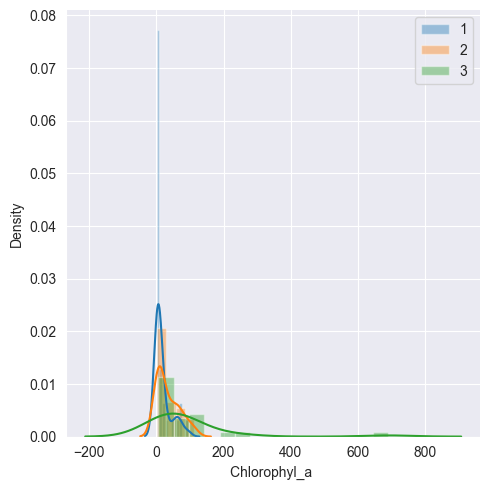

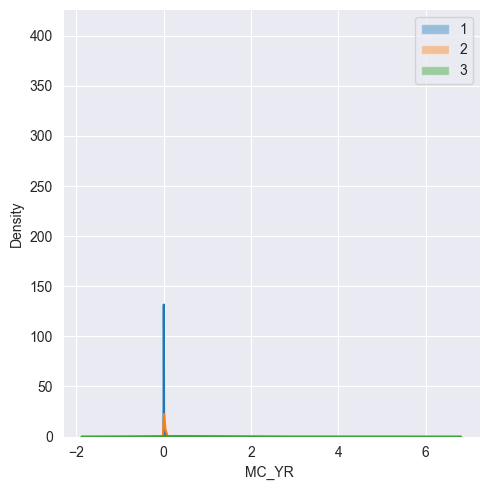

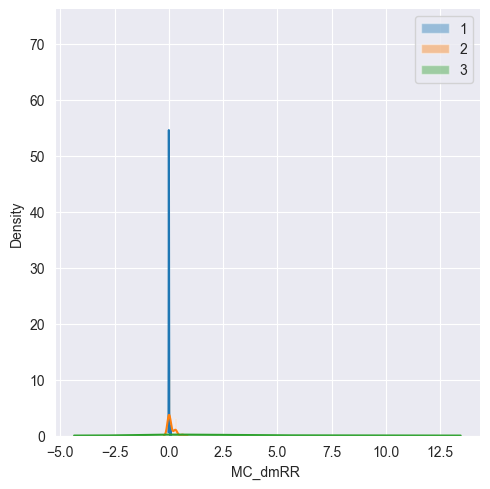

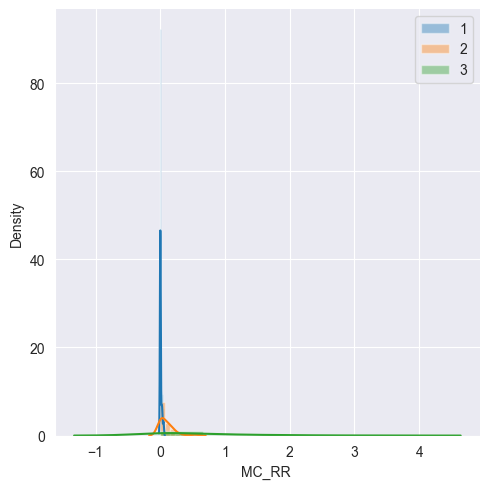

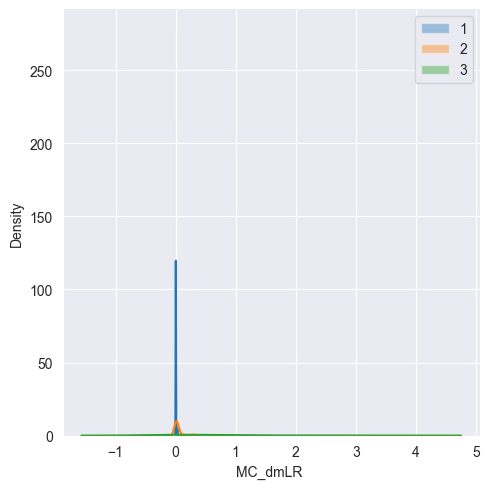

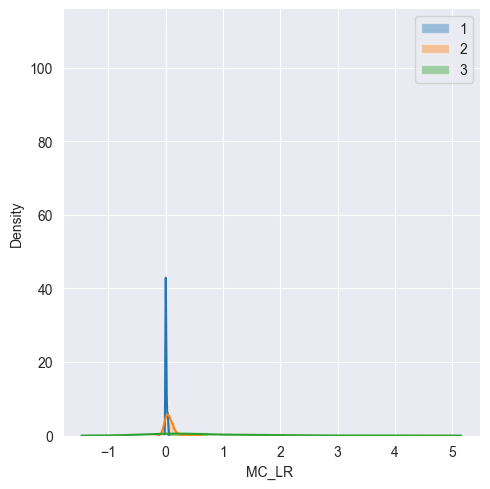

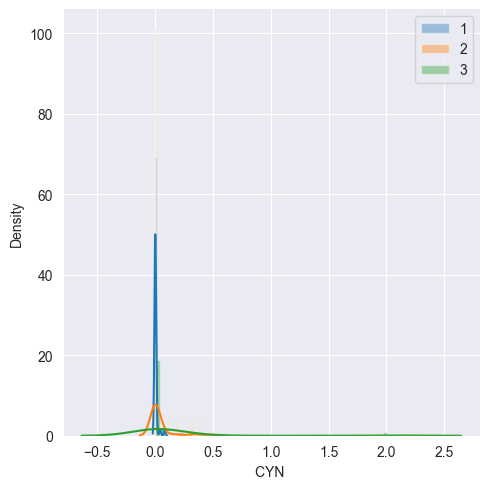

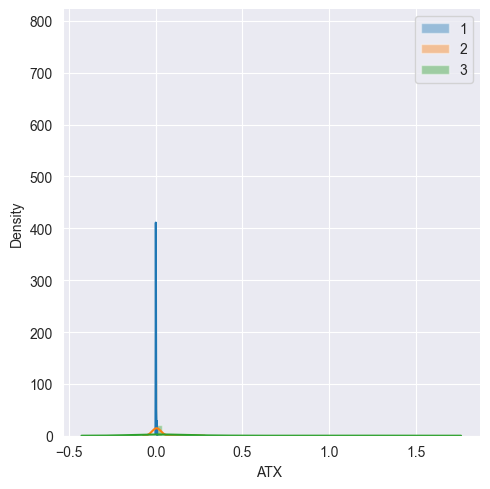

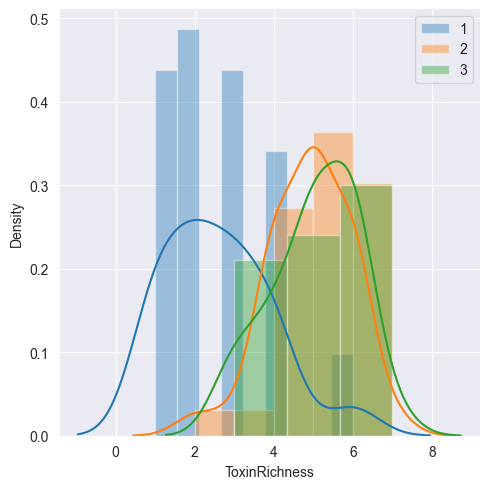

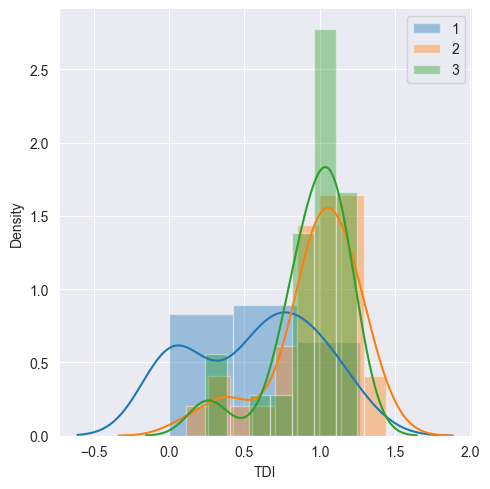

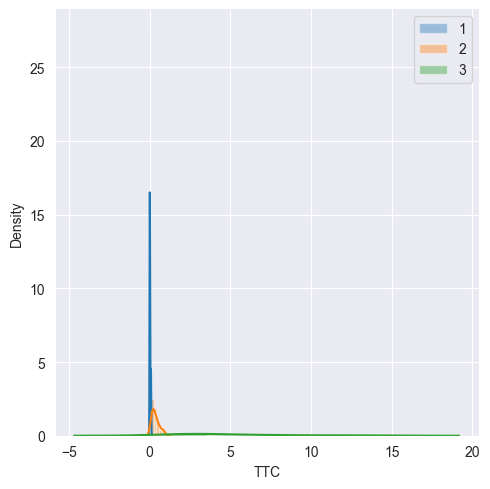

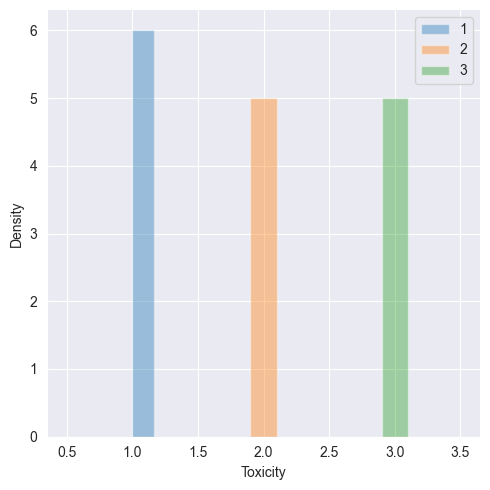

In [39]:
for i in dftrain.columns:
    sns.FacetGrid(dftrain, hue='Toxicity', height=5).map(sns.distplot, i)
    plt.legend()

Zastosujmy test Chi-Square, aby znaleźć relację przewidywania ze zmienną docelową.

Wybór zmiennych jest ważną częścią tworzenia modeli uczenia maszynowego. Uczenie algorytmów za pomocą nieistotnych zmiennych wpłynie na wydajność modelu. Znany również jako wybór cech lub wybór atrybutów, wybór lub inżynieria nowych zmiennych jest często tym, co odróżnia modele o najlepszej wydajności od reszty.

Test niezależności Chi-Square jest testem statystycznym mającym na celu określenie, czy istnieje znaczący związek między 2 zmiennymi kategorycznymi. W prostych słowach, statystyka Chi-Square sprawdzi, czy istnieje znacząca różnica w obserwowanych i oczekiwanych częstotliwościach obu zmiennych.

Hipoteza zerowa mówi, że NIE ma związku między obiema zmiennymi. Alternatywna hipoteza mówi, że istnieją dowody sugerujące, że istnieje związek między tymi dwiema zmiennymi.

Aby odrzucić hipotezę zerową, obliczona wartość P musi być poniżej zdefiniowanego progu. Powiedzmy, że jeśli użyjemy alfa 0,25, jeśli wartość p < 0,25, odrzucimy hipotezę zerową. W takim przypadku należy rozważyć użycie zmiennej w modelu.

Zasady korzystania z testu Chi-kwadrat:
- Zmienne są kategoryczne
- Częstość wynosi co najmniej 5
- Zmienne są próbkowane niezależnie

Formuła (O = Observed Value, E = Expected Value):
Epsilon = (O - E)^2 / E

In [40]:
class ChiSquare:
  def __init__(self, dataframe):
    self.df = dataframe
    self.p = None  # p-value
    self.chi2 = None  # chi test statistic
    self.dof = None

    self.df_observed = None
    self.df_expected = None

  def _print_chisquare_result(self, col_x, alpha):
    if self.p < alpha:
      result = f'{col_x} is IMPORTANT for Prediction.'
    else:
      result = f'{col_x} is NOT an important predictor. Discard {col_x} from model.'
    print(result)

  def test_independence(self, col_x, col_y, alpha=0.25):
    x = self.df[col_x].astype(str)
    y = self.df[col_y].astype(str)
    self.df_observed = pd.crosstab(y, x)
    self.chi2, self.p, self.dof, expected = stats.chi2_contingency(self.df_observed.values)
    self.df_expected = pd.DataFrame(expected, columns=self.df_observed.columns, index=self.df_observed.index)
    self._print_chisquare_result(col_x, alpha)


cT = ChiSquare(dftrain)

for column_name in dftrain.columns[:-1]:
  cT.test_independence(col_x=column_name, col_y=dftrain.columns[-1])

Latitude  is NOT an important predictor. Discard Latitude  from model.
Longitude  is NOT an important predictor. Discard Longitude  from model.
MaximumDepth  is NOT an important predictor. Discard MaximumDepth  from model.
SecchiDepth  is NOT an important predictor. Discard SecchiDepth  from model.
Sampling Depth  is NOT an important predictor. Discard Sampling Depth  from model.
T_Surf  is NOT an important predictor. Discard T_Surf  from model.
T_Epi  is NOT an important predictor. Discard T_Epi  from model.
Zeu / Zmix is NOT an important predictor. Discard Zeu / Zmix from model.
BuoyFreq is NOT an important predictor. Discard BuoyFreq from model.
TP  is IMPORTANT for Prediction.
TN  is NOT an important predictor. Discard TN  from model.
Chlorophyl_a  is NOT an important predictor. Discard Chlorophyl_a  from model.
MC_YR  is IMPORTANT for Prediction.
MC_dmRR  is IMPORTANT for Prediction.
MC_RR  is IMPORTANT for Prediction.
MC_dmLR  is IMPORTANT for Prediction.
MC_LR  is IMPORTANT for 

In [41]:
outlier_list = []
for i in dftrain.columns:
  q1 = np.percentile(dftrain.loc[:, i], 25)
  q3 = np.percentile(dftrain.loc[:, i], 75)
  step = 1.5 * (q3-q1)
  print(f'Data points considered outliers for the feature {i}')

  outliers_rows = dftrain.loc[~((dftrain[i] >= q1 - step) & (dftrain[i] <= q3 + step)), :]
  outlier_list.append(list(outliers_rows.index))
  outliers = list(chain.from_iterable(outlier_list))

uniq_outlier = list(set(outliers))

dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))
print('Outliers list:\n', uniq_outlier)
print('Length of outliers list:\n', len(uniq_outlier))

print('Duplicate list :\n', dup_outliers)
print('Length of duplicates list :\n', len(dup_outliers))

real_data = dftrain.drop(df.index[dup_outliers]).reset_index(drop=True)

print(real_data.shape)

Data points considered outliers for the feature Latitude 
Data points considered outliers for the feature Longitude 
Data points considered outliers for the feature MaximumDepth 
Data points considered outliers for the feature SecchiDepth 
Data points considered outliers for the feature Sampling Depth 
Data points considered outliers for the feature T_Surf 
Data points considered outliers for the feature T_Epi 
Data points considered outliers for the feature Zeu / Zmix
Data points considered outliers for the feature BuoyFreq
Data points considered outliers for the feature TP 
Data points considered outliers for the feature TN 
Data points considered outliers for the feature Chlorophyl_a 
Data points considered outliers for the feature MC_YR 
Data points considered outliers for the feature MC_dmRR 
Data points considered outliers for the feature MC_RR 
Data points considered outliers for the feature MC_dmLR 
Data points considered outliers for the feature MC_LR 
Data points considered o